# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)
# we want all of the features to be our x variables that we will cluster on and the coutry names we will want to keep on the side for future use


In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 5
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

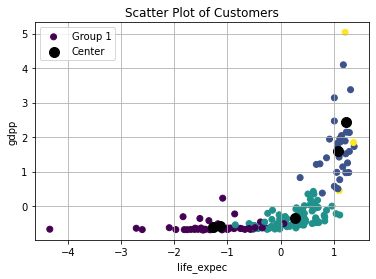

In [11]:
# comparing based on the column index 0-n
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 6
x2_index = 8


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [12]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
  kmeans = KMeans(n_clusters = k, n_init= 30) 
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

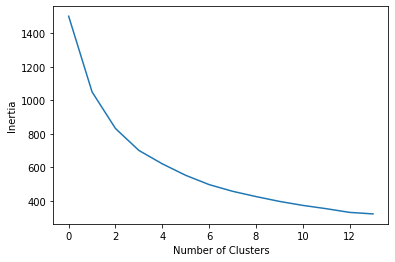

In [13]:
plt.plot(WCSSs)
plt.xlabel("Number of Clusters")
plt.ylabel('Inertia')
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

I chose 3 clusters. The reason behind this is based on the graph above and the economic interpretation of it. Looking at the above graph, you can see that after 3, the line begins to decrease at a slower rate than before that point. Additionally, from an economic interpretation, I would think there would be 3 distinct groups of countries: countries with low gdp and low life expectancy, countries with medium gdp and higher life expectancy, and countries with the highest gdp and the highest life expectancy.

In [14]:
k = 3
# want to see if clustering identifies developing countries
# will be dif for ours

In [15]:
kmeans = KMeans(n_clusters=k).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [16]:
# i am not 100% sure that this code for 5 is all that we need, some might be for 6
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [17]:
preds

,0
0,1
1,0
2,0
3,1
4,0
...,...
162,0
163,0
164,0
165,1


In [18]:
output = pd.concat([preds,names], axis = 1)

In [19]:
output

,0,country
0,1,Afghanistan
1,0,Albania
2,0,Algeria
3,1,Angola
4,0,Antigua and Barbuda
...,...,...
162,0,Vanuatu
163,0,Venezuela
164,0,Vietnam
165,1,Yemen


In [20]:
print('Cluster 1')
[output[output[0]==0]['country']]

Cluster 1


[1                  Albania
 2                  Algeria
 4      Antigua and Barbuda
 5                Argentina
 6                  Armenia
               ...         
 160                Uruguay
 161             Uzbekistan
 162                Vanuatu
 163              Venezuela
 164                Vietnam
 Name: country, Length: 84, dtype: object]

In [21]:
print('Cluster 2')
[output[output[0]==1]['country']]

Cluster 2


[0                   Afghanistan
 3                        Angola
 17                        Benin
 21                     Botswana
 25                 Burkina Faso
 26                      Burundi
 28                     Cameroon
 31     Central African Republic
 32                         Chad
 36                      Comoros
 37             Congo, Dem. Rep.
 38                  Congo, Rep.
 40                Cote d'Ivoire
 49            Equatorial Guinea
 50                      Eritrea
 55                        Gabon
 56                       Gambia
 59                        Ghana
 63                       Guinea
 64                Guinea-Bissau
 66                        Haiti
 72                         Iraq
 80                        Kenya
 81                     Kiribati
 84                          Lao
 87                      Lesotho
 88                      Liberia
 93                   Madagascar
 94                       Malawi
 97                         Mali
 99       

In [22]:
print('Cluster 3')
[output[output[0]==2]['country']]

Cluster 3


[7                 Australia
 8                   Austria
 11                  Bahrain
 15                  Belgium
 23                   Brunei
 29                   Canada
 42                   Cyprus
 43           Czech Republic
 44                  Denmark
 53                  Finland
 54                   France
 58                  Germany
 60                   Greece
 68                  Iceland
 73                  Ireland
 74                   Israel
 75                    Italy
 77                    Japan
 82                   Kuwait
 91               Luxembourg
 98                    Malta
 110             Netherlands
 111             New Zealand
 114                  Norway
 122                Portugal
 123                   Qatar
 133               Singapore
 134         Slovak Republic
 135                Slovenia
 138             South Korea
 139                   Spain
 144                  Sweden
 145             Switzerland
 157    United Arab Emirates
 158          

We can see 3 distinct groups of countries from the above clusters. In cluster 3, we notice the richest countries with the greatest life expectancy: countries like the U.S., UK, and Switzerland. In cluster 2, we notice some of the poorest countries in the world: many countries from Africa, which we would expect to have lower life expectancies. In cluster 1, we notice middling countries in terms of wealth and life expectancy: Vietnam, Argentina, and Venezuela.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [23]:
q6df = pd.concat([preds,X], axis = 1)

In [24]:
q6df

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,0,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,0,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,0,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,1,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [25]:
q6df.groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444


In [26]:
q6df.groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,13.757919,19.029182,2.167233,20.103873,8180.073696,7.849516,3.960745,0.696957,5021.434052
1,33.375229,18.160597,2.662015,17.732741,5641.790360,15.509958,6.443521,1.041382,2956.103925
2,2.188933,41.930782,3.178015,36.843998,20852.017526,4.077719,1.815742,0.373054,18991.079777


# Q7.) Write an observation about the descriptive statistics.

Looking at the tables above, we can see the 3 distinct groups of countries: rich countries with the greatest life expectancy (index 2), countries that are in the middle in terms of life expectancy and gdp (index 0), and the countries that are the poorest with the worst life expectancy (index 1). As we can see above, the richest countries have the smallest standard deviation for life expectancy, while the poorest have the largest standard deviation for life expectancy. 